In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = "data/MovieSummaries/movie_processed_enriched.csv"  
movie_df = pd.read_csv(data_file)
movie_df.head(1)

,wiki_movie_id,freebase_movie_id,movie_name,revenue,movie_runtime,languages,movie_release_date,countries_old,countries,genres,release_date,plot_summary,cast
0,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,languages,movie_release_date,countries_old,countries,NaN,NaN,NaN,NaN


In [3]:
data_file = "data/MovieSummaries/character_processed_enriched.csv"  
actor_df = pd.read_csv(data_file)
actor_df.head(1)

,wiki_movie_id,freebase_movie_id,character_name,actor_gender,actor_height,actor_ethnicity_id,actor_name,freebase_map_id,freebase_character_id,freebase_actor_id,actor_dob,movie_release_date,ethn_name,race,character_description,actor_description
0,Wikipedia movie ID,Freebase movie ID,Character name,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,actor_date_of_birth,movie_release_date,ethn_name,race,NaN,NaN


In [12]:
grouped_df = actor_df.groupby(['archetype', 'actor_name']).size().reset_index(name='actor_count')

KeyError: 'archetype'

In [10]:
def calculate_statistics(group_df, trait):
    return group_df.groupby('archetype')[trait].describe()

In [11]:
height_stats = calculate_statistics(actor_df, 'actor_height')

KeyError: 'archetype'

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=actor_df, x='archetype', y='actor_height')
plt.title('Distribution of Actor Heights by Archetype')
plt.xticks(rotation=45)
plt.show()

        wiki_movie_id  freebase_movie_id  \
0  Wikipedia movie ID  Freebase movie ID   
1              975900          /m/03vyhn   
2             3196793          /m/08yl5d   
3            28463795         /m/0crgdbh   
4             9363483         /m/0285_cd   

                                          movie_name  \
0                                         Movie name   
1                                     Ghosts of Mars   
2  Getting Away with Murder: The JonBenét Ramsey ...   
3                                        Brun bitter   
4                                   White Of The Eye   

                    revenue  movie_runtime      languages  movie_release_date  \
0  Movie box office revenue  Movie runtime      languages  movie_release_date   
1                14010832.0           98.0    ['english']          2001-08-24   
2                       NaN           95.0    ['english']          2000-02-16   
3                       NaN           83.0  ['norwegian']          1988-01

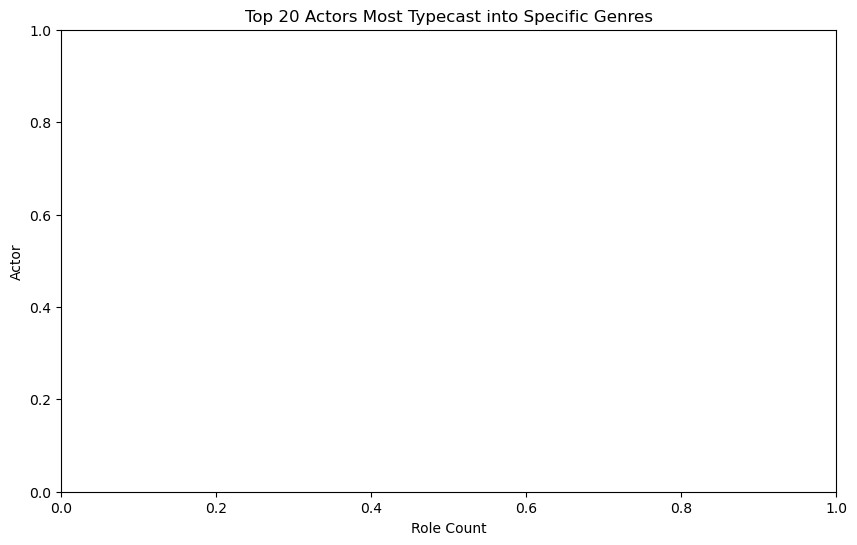

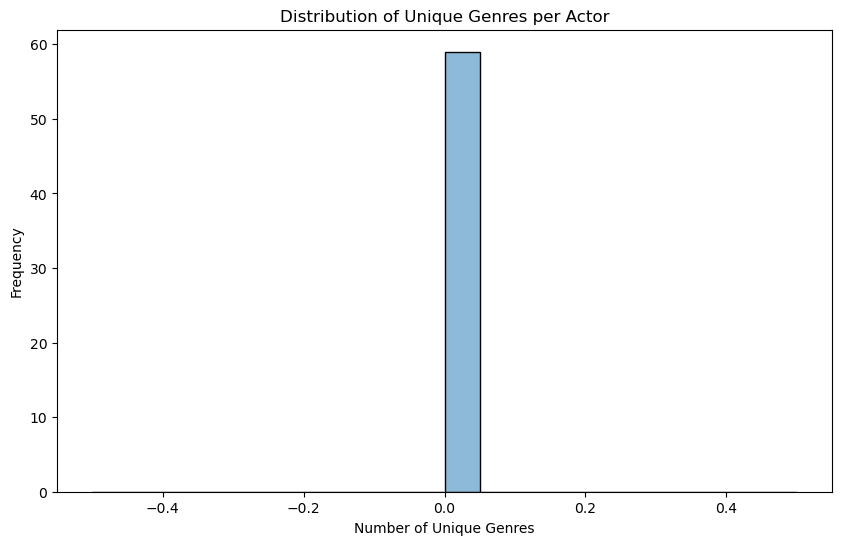

In [5]:
# Assuming there is a 'cast' column and a 'genres' column in the enriched dataset:
# Let's explode the cast to create a separate row for each actor
df['cast'] = df['cast'].str.split(',')  # Assuming cast is comma-separated
df_exploded = df.explode('cast')

# Clean whitespace in the cast names
df_exploded['cast'] = df_exploded['cast'].str.strip()

# Group by actor and count the occurrence of genres or any specific roles
actor_genre_count = df_exploded.groupby(['cast', 'genres']).size().reset_index(name='role_count')

# Analyze the typecasting - actors most commonly typecast into specific genres
top_typecasted = actor_genre_count.sort_values('role_count', ascending=False).groupby('cast').first().reset_index()

# Visualize the top typecasted actors
plt.figure(figsize=(10, 6))
sns.barplot(x='role_count', y='cast', data=top_typecasted.head(20).sort_values('role_count', ascending=True))
plt.title('Top 20 Actors Most Typecast into Specific Genres')
plt.xlabel('Role Count')
plt.ylabel('Actor')
plt.show()

# Further analysis - you could look into additional traits or roles
# E.g., count how many unique genres each actor has played
actor_unique_genres = df_exploded.groupby('cast')['genres'].nunique().reset_index()
actor_unique_genres.columns = ['cast', 'unique_genre_count']

# Visualize unique genres per actor
plt.figure(figsize=(10, 6))
sns.histplot(actor_unique_genres['unique_genre_count'], bins=20, kde=True)
plt.title('Distribution of Unique Genres per Actor')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Frequency')
plt.show()


In [16]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load movie and actor datasets
movie_data_file = "data/MovieSummaries/movie_processed_enriched.csv"  # Adjust path as necessary
actor_data_file = "data/MovieSummaries/character_processed_enriched.csv"    # Adjust path as necessary

# Read the datasets
movie_df = pd.read_csv(movie_data_file)
actor_df = pd.read_csv(actor_data_file)

In [26]:
movie_df.head(1)

,wiki_movie_id,freebase_movie_id,movie_name,revenue,movie_runtime,languages,movie_release_date,countries_old,countries,genres,release_date,plot_summary,cast
0,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,languages,movie_release_date,countries_old,countries,NaN,NaN,NaN,NaN


In [30]:
actor_df = actor_df.drop(index = 0)
actor_df.head(2)

,wiki_movie_id,freebase_movie_id,character_name,actor_gender,actor_height,actor_ethnicity_id,actor_name,freebase_map_id,freebase_character_id,freebase_actor_id,actor_dob,movie_release_date,ethn_name,race,character_description,actor_description
1,975900,/m/03vyhn,Akooshay,F,1.62,NaN,Wanda De Jesus,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,1958-08-26,2001-08-24,NaN,NaN,NaN,"Wanda De Jesus (born August 26, 1958) is an Am..."
2,975900,/m/03vyhn,Lieutenant Melanie Ballard,F,1.78,/m/044038p,Natasha Henstridge,/m/0jys3m,/m/0bgchn4,/m/0346l4,1974-08-15,2001-08-24,NaN,NaN,NaN,"Natasha Tonya Henstridge (born August 15, 1974..."


In [31]:
# Merge the datasets on wiki_movie_id and related identifiers
merged_df = pd.merge(actor_df, movie_df, on="wiki_movie_id", how="inner")

In [34]:
merged_df.head(3)

,wiki_movie_id,freebase_movie_id_x,character_name,actor_gender,actor_height,actor_ethnicity_id,actor_name,freebase_map_id,freebase_character_id,freebase_actor_id,...,revenue,movie_runtime,languages,movie_release_date_y,countries_old,countries,genres,release_date,plot_summary,cast
0,975900,/m/03vyhn,Akooshay,F,1.62,NaN,Wanda De Jesus,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,...,14010832.0,98.0,['english'],2001-08-24,['United States of America'],['United States of America'],NaN,NaN,"Set in the year 2176, Mars has been 85% terraf...",NaN
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,F,1.78,/m/044038p,Natasha Henstridge,/m/0jys3m,/m/0bgchn4,/m/0346l4,...,14010832.0,98.0,['english'],2001-08-24,['United States of America'],['United States of America'],NaN,NaN,"Set in the year 2176, Mars has been 85% terraf...",NaN
2,975900,/m/03vyhn,Desolation Williams,M,1.727,/m/0x67,Ice Cube,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,14010832.0,98.0,['english'],2001-08-24,['United States of America'],['United States of America'],NaN,NaN,"Set in the year 2176, Mars has been 85% terraf...",NaN


In [35]:
# Filling NaNs
merged_df['actor_gender'] = merged_df['actor_gender'].fillna('Unknown')
merged_df['actor_height'] = merged_df['actor_height'].fillna(0)

In [36]:
# Analyzing typecasting tendencies by counting roles by gender and genre
typecast_analysis = merged_df.groupby(['actor_name', 'actor_gender', 'genres'])['wiki_movie_id'].count().reset_index()
typecast_analysis.columns = ['actor_name', 'actor_gender', 'genres', 'role_count']
top_typecasted_actors = typecast_analysis.sort_values('role_count', ascending=False).groupby('actor_name').first().reset_index()

In [38]:
typecast_analysis

,actor_name,actor_gender,genres,role_count


In [37]:
top_typecasted_actors

,actor_name,actor_gender,genres,role_count


In [15]:
# Visualize the top typecasted actors
plt.figure(figsize=(12, 8))
sns.barplot(x='role_count', y='actor_name', data=top_typecasted_actors.head(20).sort_values('role_count', ascending=True), palette='viridis')
plt.title('Top 20 Actors Most Typecast by Genres')
plt.xlabel('Role Count')
plt.ylabel('Actor')
plt.show()

# Further analysis: Unique genres per actor
unique_genres = merged_df.groupby('actor_name')['genres'].nunique().reset_index()
unique_genres.columns = ['actor_name', 'unique_genre_count']

# Visualize the distribution of unique genres per actor
plt.figure(figsize=(10, 6))
sns.histplot(unique_genres['unique_genre_count'], bins=20, kde=True)
plt.title('Distribution of Unique Genres per Actor')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Frequency')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/movie_processed_enriched.csv'